## Sign Language MNIST 

In [ ]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [ ]:
def get_data(filename):
    with open(filename) as training_file:
        image_reader = csv.reader(training_file, delimiter = ',')
        next(image_reader, None)
        images = []
        labels = []
        for row in image_reader:
            labels += [row[0],]
            image = np.array(np.array_split(np.array(row[1:]).astype('float'), 28))
            images += [image,]
        
        labels = np.array(labels).astype('float')
        labels[np.where(labels == 24)] = 9
        images = np.array(images)
            
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)


(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [ ]:
training_images = np.expand_dims(training_images, axis = 3)
testing_images = np.expand_dims(testing_images, axis = 3)

train_datagen = ImageDataGenerator(
    rescale = 1./255,
	rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
    rescale = 1./255)

train_generator = train_datagen.flow(
    training_images,
    y = training_labels,
    batch_size=64)

validation_generator = validation_datagen.flow(
    testing_images,
    y = testing_labels,
    batch_size=64)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(24, activation='softmax')])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

history = model.fit_generator(train_generator, epochs = 2, validation_data = validation_generator)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/2
429/429 [==============================] - 46s 108ms/step - loss: 1.3797 - acc: 0.5762 - val_loss: 0.3054 - val_acc: 0.9088
Epoch 2/2
429/429 [==============================] - 47s 109ms/step - loss: 0.3901 - acc: 0.8746 - val_loss: 0.1226 - val_acc: 0.9678


[20.556464321392237, 0.9103458]

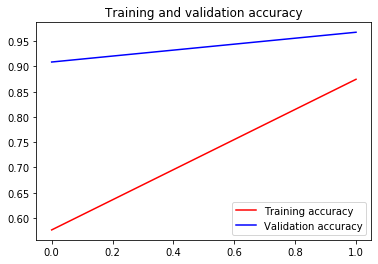

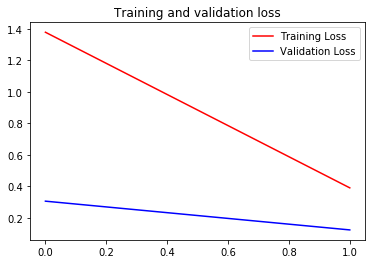

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()